In [9]:
import pandas as pd

data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data2.rename(columns={'지역':'자치구'},inplace = True)
df2 = data2[data2['연령별'] == '45~64']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data1.set_index('자치구',inplace = True)
df = pd.concat([df2,data1],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)

In [13]:
df = df[['주관적 건강수준','행복감 지수','긍정적 태도율(자연환경)','1인당 공원 면적','1인당 총 도시림 면적','1인당 생활권 도시림 면적']]
df

,주관적 건강수준,행복감 지수,긍정적 태도율(자연환경),1인당 공원 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
자치구,,,,,,
영등포구,37.3,7.0,46.5,7.6,6.957240,6.869465
양천구,39.3,7.0,78.7,6.3,7.986583,4.061179
마포구,36.3,7.0,68.2,11.5,10.633363,10.577379
동작구,41.7,7.0,80.1,11.2,9.754303,5.905544
금천구,25.0,7.0,55.3,8.8,13.431253,1.778059
구로구,31.0,7.0,54.5,7.6,8.439744,3.258437
관악구,38.0,7.0,84.6,21.2,31.661242,1.079721
강서구,35.2,7.0,68.4,7.3,14.015144,7.303483
중랑구,32.0,7.0,65.2,12.9,15.804687,3.722101


<AxesSubplot:xlabel='자치구'>

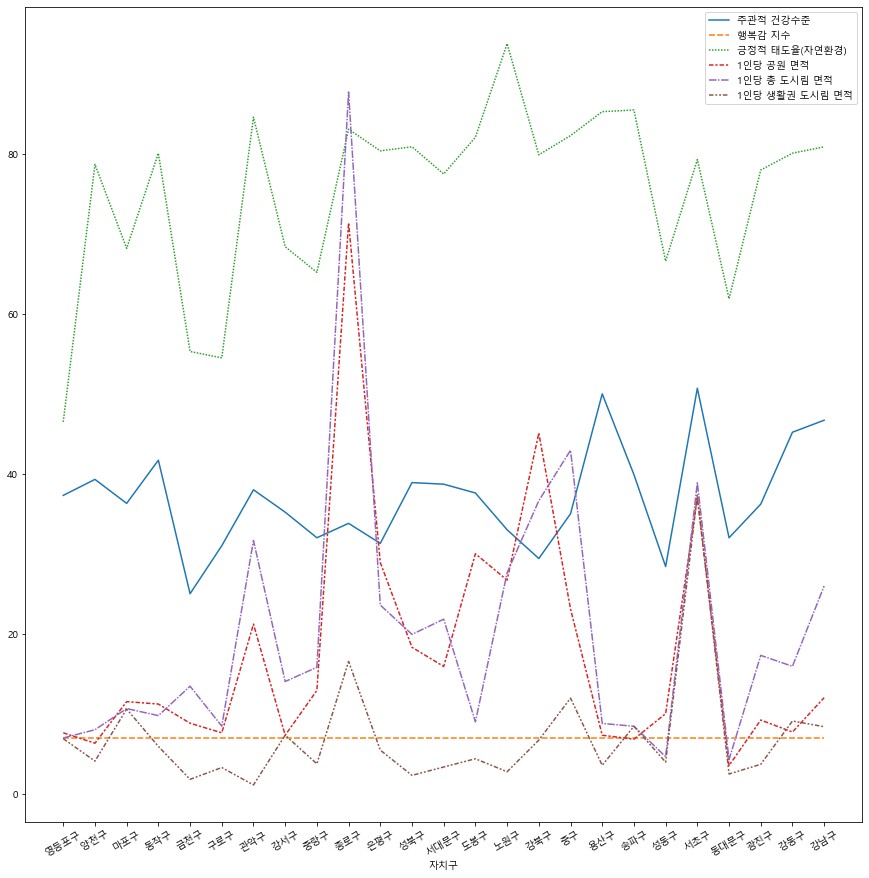

In [11]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
fm = mp.font_manager.FontManager()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,15))
plt.xticks(rotation=30)
sns.lineplot(data=df)

In [12]:
corr = df.corr()
corr

,주관적 건강수준,행복감 지수,긍정적 태도율(자연환경),1인당 공원 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
주관적 건강수준,1.000000,NaN,0.429424,-0.093351,-0.002607,0.453345
행복감 지수,NaN,NaN,NaN,NaN,NaN,NaN
긍정적 태도율(자연환경),0.429424,NaN,1.000000,0.406295,0.404771,0.144486
1인당 공원 면적,-0.093351,NaN,0.406295,1.000000,0.886708,0.458081
1인당 총 도시림 면적,-0.002607,NaN,0.404771,0.886708,1.000000,0.481289
1인당 생활권 도시림 면적,0.453345,NaN,0.144486,0.458081,0.481289,1.000000


C:\Users\gimhu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gimhu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


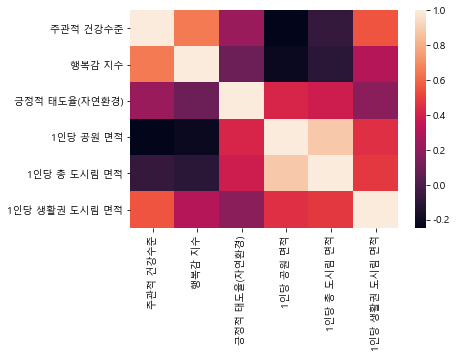

In [5]:
sns.heatmap(corr)
plt.rc('axes', unicode_minus=False)
plt.show()

In [6]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
df1 = df[['행복감 지수','1인당 생활권 도시림 면적']]
df1.rename(columns={'행복감 지수':'행복감지수','1인당 생활권 도시림 면적':'_1인당생활권도시림면적'},inplace = True)

C:\Users\gimhu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='행복감지수', ylabel='_1인당생활권도시림면적'>

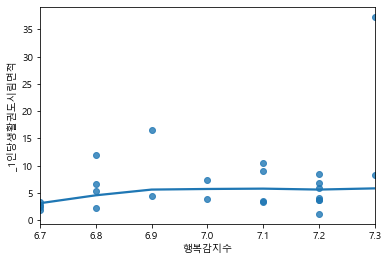

In [8]:
sns.regplot('행복감지수','_1인당생활권도시림면적', lowess=True, data = df1)

In [115]:
model = smf.ols(formula = '주관적건강수준 ~ _1인당생활권도시림면적', data = df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                주관적건강수준   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     10.11
Date:                Wed, 14 Jul 2021   Prob (F-statistic):            0.00418
Time:                        15:41:12   Log-Likelihood:                -75.610
No. Observations:                  25   AIC:                             155.2
Df Residuals:                      23   BIC:                             157.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.0649      1.454     24.808      0.000      33.058      39.072
_1인당생활권도시림면적     0.4631      0.146      3.180      0.004       0.162       0.764
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.004
Skew:                           0.027   Prob(JB):                        0.998
Kurtosis:                       2.967   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

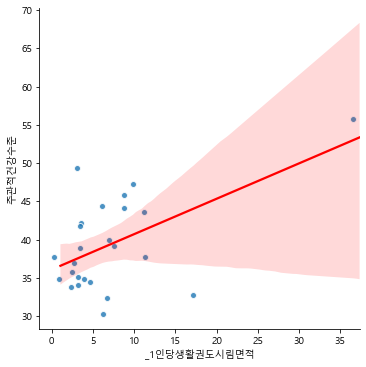

In [116]:
sns.lmplot(x="_1인당생활권도시림면적", y="주관적건강수준", data=df1, line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)